# Práctico 1 - Procesamiento Digital de Imágenes

In [47]:
# Trabajo en Colab, así que necesito conectarme a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

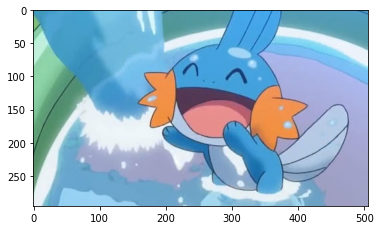

In [24]:
url = 'https://www.nintenderos.com/wp-content/uploads/2020/05/Pokemon-6.jpg'

# Cargar la imagen
img_rgb = imageio.imread(url)/255

# Mostrar la imagen
plt.imshow(img_rgb)

## Seleccionar el canal rojo

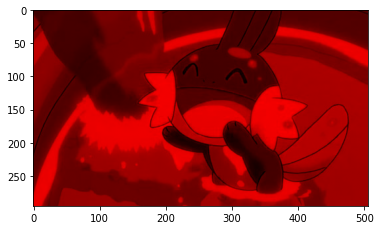

In [25]:
M = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])

img_canal_rojo = apply_matrix(img_rgb, M)

plt.imshow(img_canal_rojo)

## Imagen en escala de grises

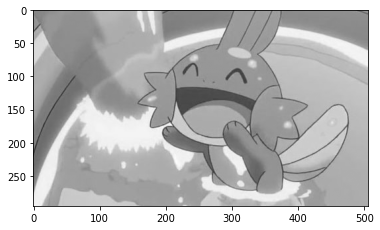

In [26]:
M = np.ones((3,3))/3

img_gris = apply_matrix(img_rgb, M)

plt.imshow(img_gris)

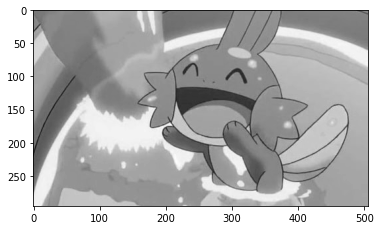

In [27]:
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, 'gray')

## Otros mapas de colores

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

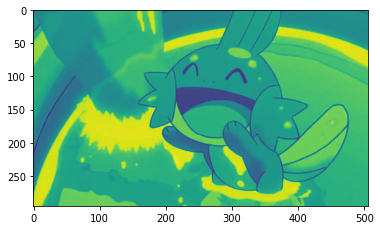

In [28]:
plt.imshow(img_gris_2)

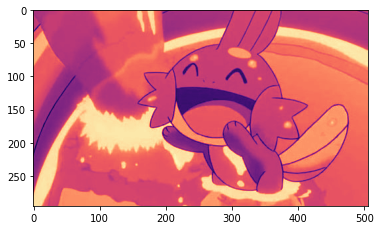

In [29]:
plt.imshow(img_gris_2, 'magma')

## Matriz aleatoria

[[0.51240125 0.10937918 0.62757821]
 [0.17333194 0.05280757 0.9105638 ]
 [0.02479561 0.59949828 0.15087097]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

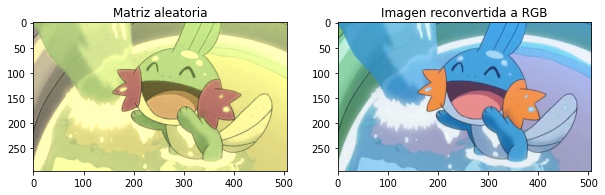

In [93]:
M = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M)

M_inv = np.linalg.inv(M)
img_random_inv = apply_matrix(img_random, M_inv)

print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Matriz aleatoria')
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[1].set_title('Imagen reconvertida a RGB')

## 1. Intercambiar los canales: R->G, G->B, B->R

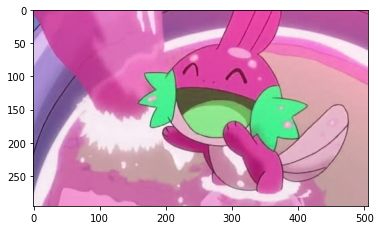

In [31]:
M = np.array([[0, 0, 1], 
              [1, 0, 0], 
              [0, 1, 0]])

img_inter = apply_matrix(img_rgb, M)

plt.imshow(img_inter)

## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

Text(0.5, 1.0, 'Editada')

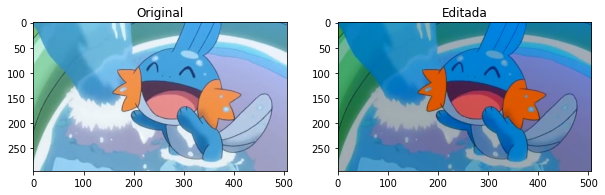

In [44]:
M = np.array([[0.299, 0.587, 0.114],
              [0.59590059, -0.27455667, -0.32134392],
              [0.21153661, -0.52273617, 0.31119955]])

alpha = 0.7   # disminuyo luminancia
beta = 1.4    # aumento saturación

# 1) Pasar a YIQ
img_yiq = apply_matrix(img_rgb, M)

# 2) Editar
img_yiq_edit = np.zeros(img_yiq.shape)
img_yiq_edit[:,:,0] = alpha*img_yiq[:,:,0]
img_yiq_edit[:,:,1] = beta*img_yiq[:,:,1]
img_yiq_edit[:,:,2] = beta*img_yiq[:,:,2]

# 3) Pasar a RGB
img_rgb_edit = apply_matrix(img_yiq_edit, np.linalg.inv(M))

# 4) Clippear
img_rgb_edit = np.clip(img_rgb_edit, 0, 1)

# 5) Mostrar
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb)
axes[0].set_title('Original')
axes[1].imshow(img_rgb_edit)
axes[1].set_title('Editada')

## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

In [55]:
import seaborn as sns
# %matplotlib notebook

path = Path('/content/drive/MyDrive/Colab Notebooks/PDI/mandelbrot.npy')
x = np.load(path)

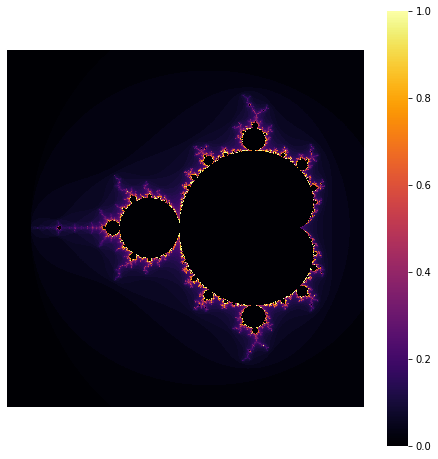

In [54]:
# Paleta secuencial perceptualmete uniforme
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='inferno', square=True, xticklabels=False, yticklabels=False)

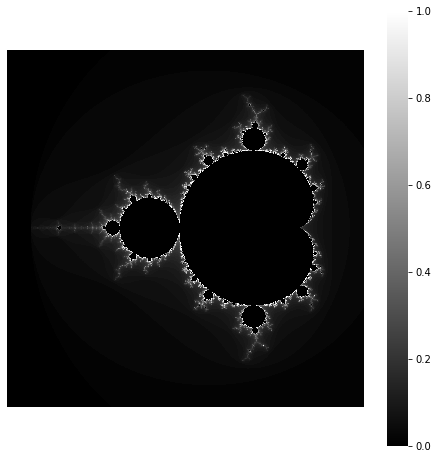

In [66]:
# Paleta secuencial escala de grises
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='gray', square=True, xticklabels=False, yticklabels=False)

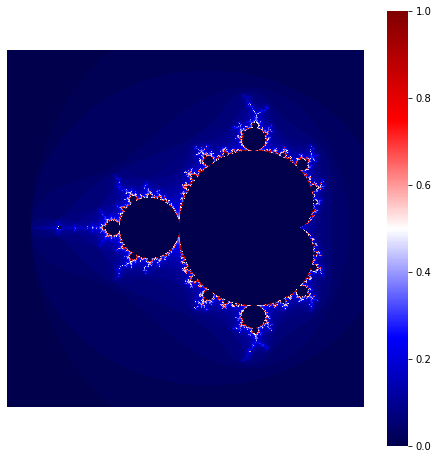

In [67]:
# Paleta divergente
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='seismic', square=True, xticklabels=False, yticklabels=False)

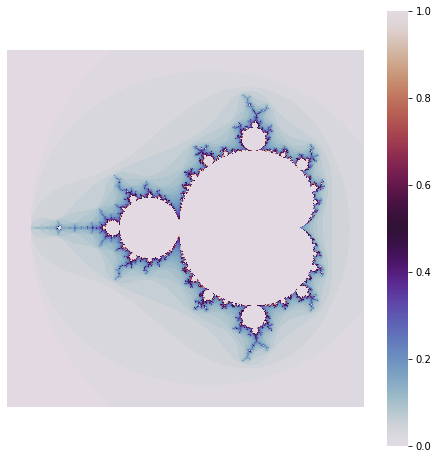

In [68]:
# Paleta cíclica
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='twilight', square=True, xticklabels=False, yticklabels=False)

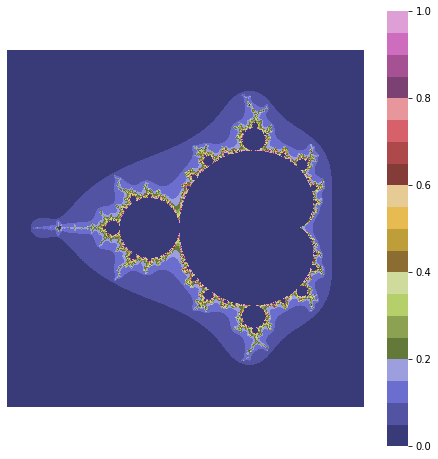

In [76]:
# Paleta cualitativa
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='tab20b', square=True, xticklabels=False, yticklabels=False)

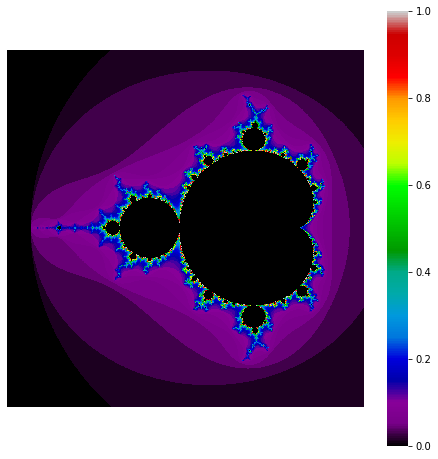

In [86]:
# Paleta miscelánea
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='nipy_spectral', square=True, xticklabels=False, yticklabels=False)